In [2]:
import pandas as pd # pandas — это библиотека Python для обработки и анализа структурированных данных
import numpy as np # nympy - библиотека для работы с массивами
import os # os — это встроенная библиотека языка программирования, предоставляющая интерфейс для взаимодействия с базовой операционной системой
from sklearn.metrics import accuracy_score, f1_score # импорт различных метрик, например по заданию  f1_score - это среднее гармоническое precision_score и 
                                                                                                                                                #recall_score
from sklearn.decomposition import PCA # PSA - метод главных компонент
import seaborn as sns # seaborn — это библиотека визуализации данных Python
import matplotlib.pyplot as plt # matplotlib — это библиотека визуализации данных Python

In [3]:
"""
Класс логистической регрессии был модифицирован и теперь метод fit возвращает список со значениями
функции ошибки (binary cross-entropy) на каждой итерации обучения.

Вы можете сравнивать графики функции ошибки для модели, обученной на `простом наборе трансформаций` (пункт 1.1), и для модели, 
обученной на трансформированных данных (данные из пункта 1.3), для анализа влияния трансформаций на динамику обучения модели 
(ускорение обучения, ошибка ниже на первой итерации и т.д.).
"""

def sigmoid(x): # сигмойда превращает x в число от 0 до 1
    return 1 / (1 + np.exp(-x))


def binary_cross_entropy(pred, label): # функция бинарной кросс-энтропии
    return -np.mean(label * np.log(pred + 1e-6) + (1. - label) * np.log(1 - pred + 1e-6))


class LogisticRegression:
    def __init__(self, dim=2):
        # dim - размерность входных данных.
        self.w = np.random.randn(dim, 1) / np.sqrt(dim)
        self.b = np.zeros((1,))
        
    def predict(self, x, probs=False):
        x = x.dot(self.w) + self.b
        p = sigmoid(x)
        if probs:
            return p
        return np.array(p > 0.5).astype('int32')
        
    def fit(self, x, y, iters=500, lr=0.1):
        # x - np.array размерности [N, dim]
        #     Массив входных признаков.
        # y - np.array размернсоти [N]
        #     Массив меток (правильных ответов).
        # Алгоритм градиентного спуска.
        # Минимизируется бинарная кросс-энтропия.
        y = y.reshape(-1, 1)
        loss = []
        for i in range(iters):
            preds = self.predict(x, probs=True)
            self.w -= lr * x.T.dot(preds - y) / y.shape[0]
            self.b -= lr * np.mean(preds - y, axis=0)
            loss.append(binary_cross_entropy(preds, y))
        plt.plot(loss) # построение графика функции ошибок
        plt.show() 
        print(loss[499]) # показывает значении функции ошибок после всех вычислений

In [4]:
def load_data(folder_path): # функция загрузки данных
    x_train = pd.read_csv(os.path.join(folder_path, 'x_train.csv'))
    y_train = pd.read_csv(os.path.join(folder_path, 'y_train.csv'))
    x_test = pd.read_csv(os.path.join(folder_path, 'x_test.csv'))
    y_test = pd.read_csv(os.path.join(folder_path, 'y_test.csv'))
    return x_train, y_train, x_test, y_test

In [5]:
x_train, y_train, x_test, y_test = load_data('dataset') # загрузка данных

In [6]:
x_train.head() # вывод данных

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,38278,19692,3289,40071,335,0,1,1,4278,8.947639,4.603086,0.768817,9.366760,0.078308,5.987230,10,0,11,0,136
1,97523,54632,3544,1563,1091,0,0,1,4583,21.279293,11.920576,0.773293,0.341043,0.238054,15.415350,13,2,13,2,156
2,13533,2835,1246,1217,95,0,1,1,4629,2.923526,0.612443,0.269173,0.262908,0.020523,2.275281,7,2,11,0,119
3,13159,13950,2009,9477,161,0,0,1,4256,3.091870,3.277726,0.472039,2.226739,0.037829,6.943753,14,0,14,0,108
4,34670,19234,544,6587,121,1,1,1,3280,10.570122,5.864024,0.165854,2.008232,0.036890,35.356618,6,0,16,0,159


В данной лабораторной работе будет практиковаться обработка данных на примере датасета для задачи распознавания ботов в социальной сети Твиттер. Класс 0 означает человек, класс 1 означает бот. Обучите модель так, чтобы вероятность пропуска бота составляла менее 4% (данный порог может быть ослаблен в зависимости от общих результатов лабораторных). Значение метрики F1 должно быть не менее 0.95.

Требование: использовать лишь 10 признаков (это могут быть либо сгенерированные признаки, либо отобранные).

Допускается коллаборация (использование подходов к обработке данных, придуманных другими студентами) при условии ссылки на автора подхода в комментариях к коду (фамилия и инициалы).

## 1.1 Обучение baseline модели

Указание: в данном пункте не применяйте трансформации к данным за рамками указанных. Это необходимо для того, чтобы вы могли проводить сравнение в дальнейшем для лучшего понимания влияния вашего подхода к обработке данных на качество модели. Обучение baseline модели - стандартная практика, что даёт вам минимально рабочую модель и при этом позволяет отслеживать ваш прогресс.

In [7]:
# Нормализуйте данные одним из способов: 
# - средним и стд
# - приведением значений в интервал [-1, 1]
# - приведением значений в интервал [0, 1]

#x_min = np.min(x_train, axis = 0) минимаксная нормировка 
#x_max = np.max(x_train, axis = 0)
#x_normed = (x_train - x_min) / (x_max - x_min)

mean = np.mean(x_train, axis = 0) # нормировка средним данных для обучения
std = np.std(x_train,axis = 0)
x_normed = (x_train - mean) / std

#max = np.max(x_train, axis = 0) нормировка делением на максимальное
#x_normed = x_train / max
x_normed.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,0.199028,-0.094358,0.212670,1.173834,-0.111672,-0.574945,0.650597,0.593391,0.732413,0.055581,-0.103832,0.193301,0.989670,-0.128749,-0.104515,-0.434171,-0.236520,-0.611723,-0.152028,0.585955
1,1.186311,-0.051457,0.253581,-0.360302,0.093648,-0.574945,-1.537050,0.593391,0.979399,0.608800,-0.060841,0.196388,-0.362716,0.081707,-0.104241,0.701020,3.532102,-0.192705,4.712865,1.050268
2,-0.213333,-0.115055,-0.115099,-0.374087,-0.176853,-0.574945,0.650597,0.593391,1.016650,-0.214670,-0.127277,-0.151318,-0.374423,-0.204877,-0.104622,-1.569362,3.532102,-0.611723,-0.152028,0.191288
3,-0.219565,-0.101408,0.007313,-0.045013,-0.158928,-0.574945,-1.537050,0.593391,0.714597,-0.207118,-0.111619,-0.011395,-0.080169,-0.182077,-0.104487,1.079417,-0.236520,0.016804,-0.152028,-0.064085
4,0.138903,-0.094920,-0.227724,-0.160149,-0.169791,1.739298,0.650597,0.593391,-0.075759,0.128369,-0.096424,-0.222580,-0.112909,-0.183314,-0.103663,-1.947760,-0.236520,0.435823,-0.152028,1.119916


In [8]:
#x_min_test = np.min(x_test, axis = 0)
#x_max_test = np.max(x_test, axis = 0)
#x_normed_test = (x_test - x_min_test) / (x_max_test - x_min_test)

mean_test = np.mean(x_test, axis = 0) # нормировка средним данных для тестирования
std_test = np.std(x_test,axis = 0)
x_normed_test = (x_test - mean_test) / std_test

#max_test = np.max(x_test, axis = 0)
#x_normed_test = x_test / max
x_normed_test.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,4.614812,1.121562,-0.060593,-0.228973,2.638775,-0.535596,0.638455,0.561310,1.040050,3.573017,0.725314,-0.127768,-0.248873,2.229453,-0.139320,0.651690,-0.209419,-0.193811,-0.140622,0.526904
1,-0.074950,-0.277786,0.305624,0.095164,-0.396356,-0.535596,0.638455,0.561310,0.153832,-0.086808,-0.243138,0.327281,0.079359,-0.407971,-0.153469,1.422160,-0.209419,0.012462,-0.140622,0.618631
2,-0.511496,-0.293043,-0.356328,-0.496006,-0.440423,1.867078,0.638455,-1.781548,-1.964465,-0.436943,-0.256728,-0.364990,-0.423291,-0.455729,-0.152136,0.651690,-0.209419,1.456372,-0.140622,0.297587
3,-0.305505,-0.293105,-0.356510,-0.496006,-0.441210,1.867078,0.638455,-1.781548,-2.033637,0.422703,-0.256922,-0.365672,-0.423291,-0.458936,1.679304,1.422160,-0.209419,2.075191,-0.140622,-0.367433
4,-0.023964,-0.197231,0.486371,-0.429087,-0.043818,-0.535596,0.638455,0.561310,1.050629,-0.162596,-0.190601,0.310097,-0.379703,-0.113027,-0.153200,0.266454,-0.209419,0.425008,-0.140622,-1.514020


In [9]:
# Снизьте размерность данных одним из способов:
# - вручную отобрав 10 признаков
# - используя PCA (from sklearn.decomposition import PCA)

pca  = PCA(n_components=x_normed.shape[1]).fit(x_normed) 
pca.explained_variance_.cumsum()/pca.explained_variance_.sum() # показывает сколько процентов дисперсии объясняет каждая из компонент, накапливая проценты

array([0.20067335, 0.34336317, 0.44109496, 0.52677242, 0.60619629,
       0.67826898, 0.74591249, 0.80341021, 0.84893441, 0.89314923,
       0.93157557, 0.95437912, 0.97427838, 0.98668853, 0.99480233,
       0.99765596, 0.99892482, 0.99967281, 0.99996259, 1.        ])

In [10]:
pca2  = PCA(n_components = 10).fit(x_normed) # ограничимся 10 компонентами
new_x_normed = pca2.transform(x_normed)
new_x_normed.shape

(1920, 10)

In [11]:
pca_test  = PCA(n_components = 10).fit(x_normed_test) # ограничимся 10 компонентами
new_x_normed_test = pca_test.transform(x_normed_test)
new_x_normed_test.shape

(480, 10)

In [12]:
y_train.shape

(1920, 1)

In [13]:
new_x_normed_test.shape

(480, 10)

In [14]:
y1_train = y_train.values # значения y_train и y_test
y1_test = y_test.values

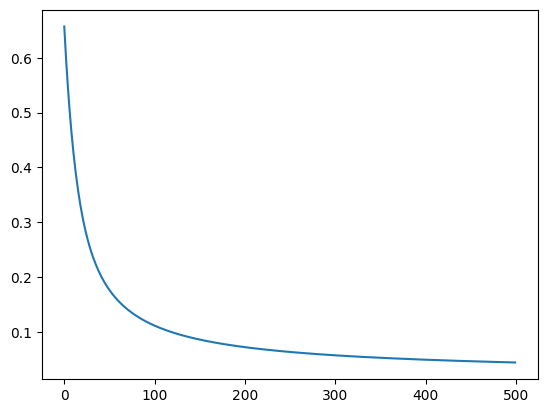

0.04388952686373993


In [15]:
# Обучите baseline модель, с которой будете проводить сравнение.
# Используйте модель логистической регрессии выше.
model = LogisticRegression(dim = new_x_normed.shape[1]) # создание объекта логистической регрессии
model.fit(new_x_normed,y1_train) # обучение модели с помощью метода fit
# Напишите ваш код здесь.

In [16]:
# Оцените качество обученной модели.
preds = model.predict(new_x_normed_test) # получаем предсказания на тестовой выборке
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds))) # вывод метрик
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))
# Напишите ваш код здесь.

Accurace : 0.70
F1 : 0.07


## 1.2 Анализ данных

<AxesSubplot: ylabel='Count'>

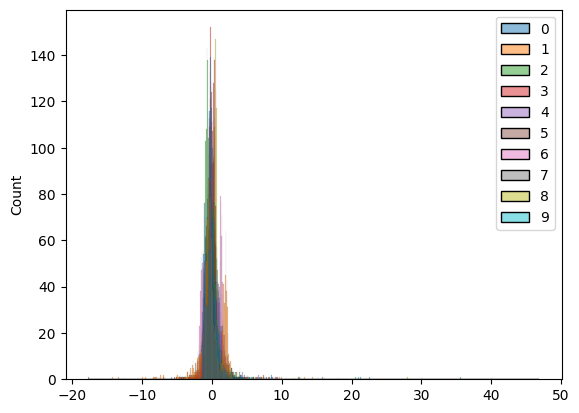

In [17]:
# Проанализируйте данные (наличие выбросов, распределения отдельных признаков), предложите способы нормировки/улучшения качества данных. 
# Предложения должны быть описаны комментариями по пунктам.
# Подсказка: клиппинг значений (np.clip), PCA.
sns.histplot(new_x_normed) # гистограмма распредения
# Напишите ваш код здесь.

Как мы видим из графика, данные являются сильно разрозненными. Что можно предложить для улучшения данных:
    
    1)Воспользоваться методом 95 перцентиля для обработки выбросов;
    
    2)Воспользоваться правилом 3 сигма для обработки выбросов;
    
    3)Использовать нормализацию, при которой мы делим каждое значение на максимальное;
    
    4)Применить метод 95 перцентиля для обработки выбросов для нормализации в 3 пункте;
    
    5)Применить правило 3 сигма для обработки выбросов для нормализации в 3 пункте;
    
    6)Использовать минимаксную нормализацию с сайта: https://wiki.loginom.ru/articles/data-normalization.html
    
    7)Применить метод 95 перцентиля для обработки выбросов для нормализации в 6 пункте;
    
    8)Применить правило 3 сигма для обработки выбросов для нормализации в 6 пункте.

1)Воспользуемся методом 95 перцентиля для обработки выбросов

<AxesSubplot: ylabel='Count'>

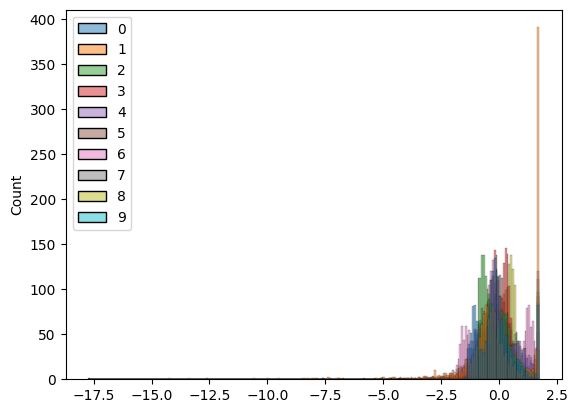

In [18]:
perc = np.percentile(new_x_normed,95) # 95 перцентиля
left_lim = -18 # левая граница
right_lim = perc # правая граница
new_x_normed_1 = np.clip(left_lim, right_lim, new_x_normed) # ограничение размера
sns.histplot(new_x_normed_1) # гистограмма распределения

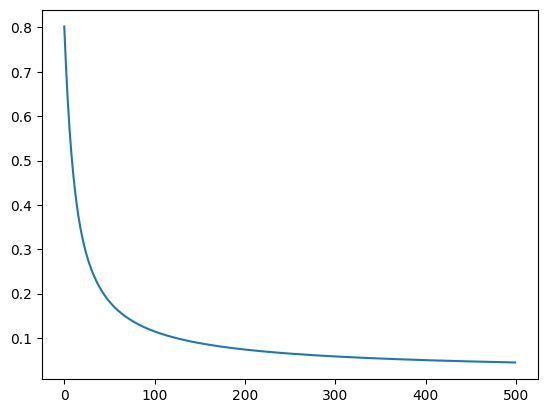

0.04466969029948301


In [19]:
model = LogisticRegression(dim = new_x_normed.shape[1])
model.fit(new_x_normed,y1_train)

In [20]:
preds = model.predict(new_x_normed_test) 
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds)))
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))

Accurace : 0.69
F1 : 0.04


Как мы видим, метод 95 перцентиля улучшает значение метрики F1, но не существенно

2)Воспользоваемся правилом 3 сигма для обработки выбросов;

<AxesSubplot: ylabel='Count'>

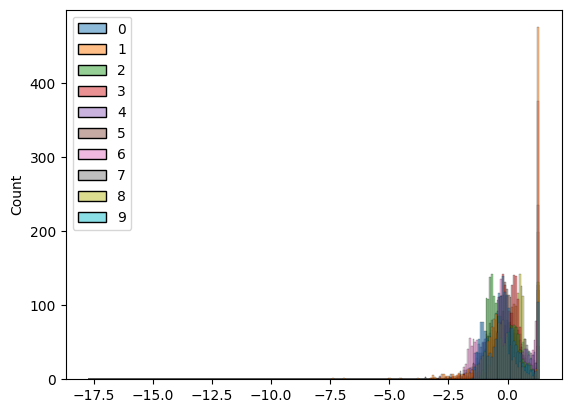

In [21]:
std = np.std(new_x_normed) # сигма
mean = np.mean(new_x_normed) # среднее арифмитическое
left_lim = mean - std # левая граница
right_lim = mean + std # правая граница
new_x_normed_2 = np.clip(left_lim, right_lim, new_x_normed)
sns.histplot(new_x_normed_2) # гистограмма

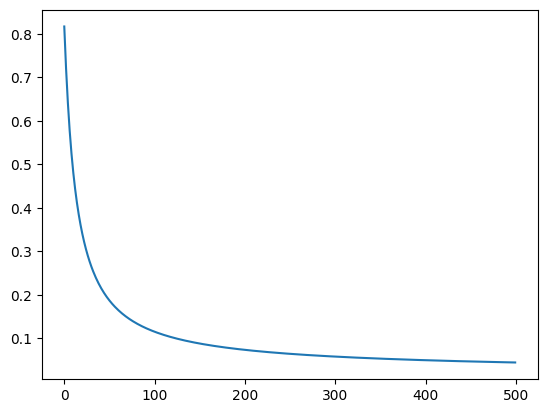

0.04459854239448412


In [22]:
model = LogisticRegression(dim = new_x_normed.shape[1])
model.fit(new_x_normed,y1_train)

In [23]:
preds = model.predict(new_x_normed_test) 
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds)))
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))

Accurace : 0.69
F1 : 0.04


Видно, что правило трех сигм раборает лучше для данной нормировки

## 1.3 Обработка данных

3)Используем нормализацию, при которой мы делим каждое значение на максимальное;

In [24]:
x_train, y_train, x_test, y_test = load_data('dataset')

In [25]:
# Реализуйте идеи по нормироке/улучшению качества данных.
# для данных для обучения
max = np.max(x_train, axis = 0) # максимальное значение в выборке
x_normed = x_train / max # нормированное значение
x_normed.head()
# Напишите ваш код здесь.

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,0.021649,0.001065,0.025548,0.086595,0.002983,0.0,1.0,1.0,0.793987,0.012626,0.001143,0.028081,0.077081,0.003575,0.000004,0.666667,0.00,0.229167,0.00,0.800000
1,0.055157,0.002955,0.027529,0.003378,0.009715,0.0,0.0,1.0,0.850594,0.030027,0.002961,0.028244,0.002807,0.010867,0.000011,0.866667,0.25,0.270833,0.25,0.917647
2,0.007654,0.000153,0.009679,0.002630,0.000846,0.0,1.0,1.0,0.859131,0.004125,0.000152,0.009831,0.002164,0.000937,0.000002,0.466667,0.25,0.229167,0.00,0.700000
3,0.007442,0.000754,0.015606,0.020480,0.001434,0.0,0.0,1.0,0.789903,0.004363,0.000814,0.017241,0.018324,0.001727,0.000005,0.933333,0.00,0.291667,0.00,0.635294
4,0.019608,0.001040,0.004226,0.014235,0.001078,1.0,1.0,1.0,0.608760,0.014916,0.001457,0.006058,0.016526,0.001684,0.000026,0.400000,0.00,0.333333,0.00,0.935294


In [26]:
# для теста
max_test = np.max(x_test, axis = 0) # максимальное значение в выборке
x_normed_test = x_test / max # нормированное значение
x_normed_test.head()

,statuses_count,followers_count,friends_count,favourites_count,listed_count,is_default_profile,is_profile_use_background_image,is_verified,user_age,tweets_freq,followers_growth_rate,friends_growth_rate,favourites_growth_rate,listed_growth_rate,followers_friends_ratio,screen_name_length,num_digits_in_screen_name,length_of_name,num_digits_in_name,description_length
0,0.138447,1.607804e-02,0.012654,0.012582,0.034855,0.0,1.0,1.0,0.871938,0.073526,0.015719,0.012665,0.010198,0.038030,1.359252e-04,0.866667,0.0,0.270833,0.0,0.794118
1,0.012761,1.743722e-04,0.028314,0.027854,0.000508,0.0,1.0,1.0,0.669822,0.008822,0.000222,0.036889,0.029390,0.000721,6.588209e-07,1.000000,0.0,0.291667,0.0,0.817647
2,0.001061,9.735418e-07,0.000008,0.000000,0.000009,1.0,1.0,0.0,0.186711,0.002631,0.000004,0.000036,0.000000,0.000045,1.340733e-05,0.866667,0.0,0.437500,0.0,0.735294
3,0.006582,2.704283e-07,0.000000,0.000000,0.000000,1.0,1.0,0.0,0.170935,0.017830,0.000001,0.000000,0.000000,0.000000,1.752189e-02,1.000000,0.0,0.500000,0.0,0.564706
4,0.014127,1.089880e-03,0.036043,0.003153,0.004497,0.0,1.0,1.0,0.874350,0.007482,0.001063,0.035974,0.002549,0.004893,3.234808e-06,0.800000,0.0,0.333333,0.0,0.270588


In [27]:
pca  = PCA(n_components=x_normed.shape[1]).fit(x_normed)
pca.explained_variance_.cumsum()/pca.explained_variance_.sum()

array([0.36488094, 0.71770307, 0.81939759, 0.89882819, 0.93879112,
       0.95463432, 0.96651907, 0.97411694, 0.98124105, 0.98824577,
       0.99414968, 0.99664649, 0.9985132 , 0.99931304, 0.99975671,
       0.99985961, 0.99993749, 0.99998745, 0.99999862, 1.        ])

In [28]:
pca2  = PCA(n_components = 10).fit(x_normed)
new_x_normed = pca2.transform(x_normed)
new_x_normed.shape

(1920, 10)

In [29]:
pca_test  = PCA(n_components = 10).fit(x_normed_test)
new_x_normed_test = pca_test.transform(x_normed_test)
new_x_normed_test.shape

(480, 10)

In [30]:
y1_train = y_train.values
y1_test = y_test.values

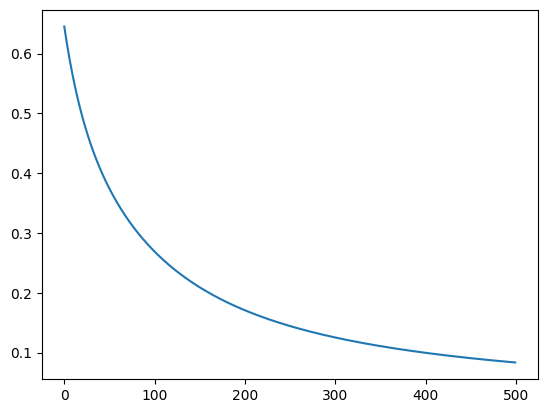

0.08332902254225531


In [31]:
model = LogisticRegression(dim = new_x_normed.shape[1])
model.fit(new_x_normed,y1_train)

In [32]:
# Оцените качество обученной модели.
preds = model.predict(new_x_normed_test) 
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds)))
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))
# Напишите ваш код здесь.

Accurace : 0.99
F1 : 0.97


Из данного значения метрики видно, что нормировка с помощью данного метода работает намного лучше, чем нормировка средним

4)Применим метод 95 перцентиля для обработки выбросов для нормализации в 3 пункте;

<AxesSubplot: ylabel='Count'>

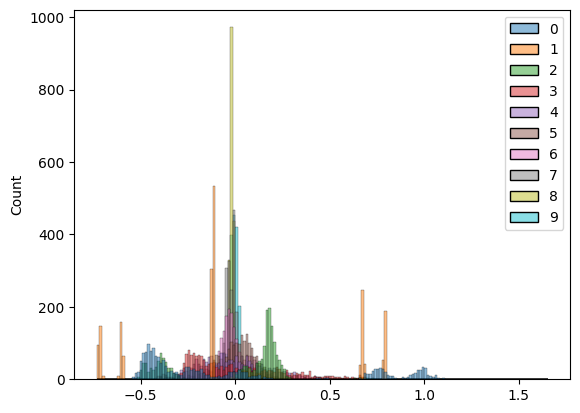

In [33]:
sns.histplot(new_x_normed)

<AxesSubplot: ylabel='Count'>

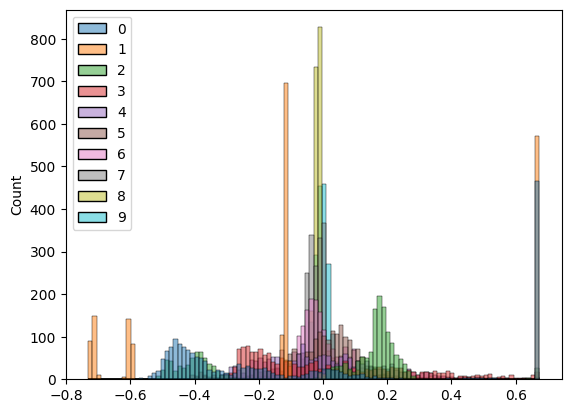

In [34]:
perc = np.percentile(new_x_normed,95)
left_lim = -1
right_lim = perc
new_x_normed_3 = np.clip(left_lim, right_lim, new_x_normed)
sns.histplot(new_x_normed_3)

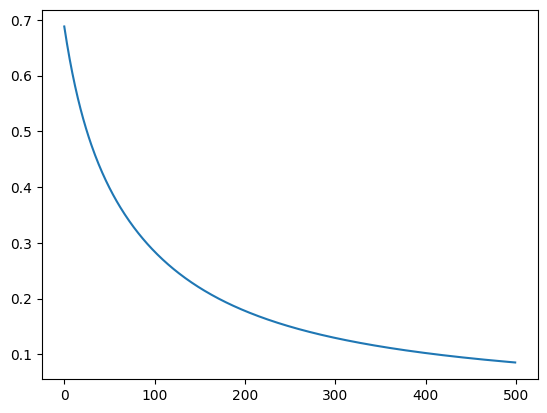

0.08524497948671383


In [35]:
model = LogisticRegression(dim = new_x_normed.shape[1])
model.fit(new_x_normed,y1_train)

In [36]:
preds = model.predict(new_x_normed_test) 
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds)))
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))

Accurace : 0.98
F1 : 0.96


Применение метода 95 перцентиля ухудшает результаты F1

5)Применим правило 3 сигма для обработки выбросов для нормализации в 3 пункте;

<AxesSubplot: ylabel='Count'>

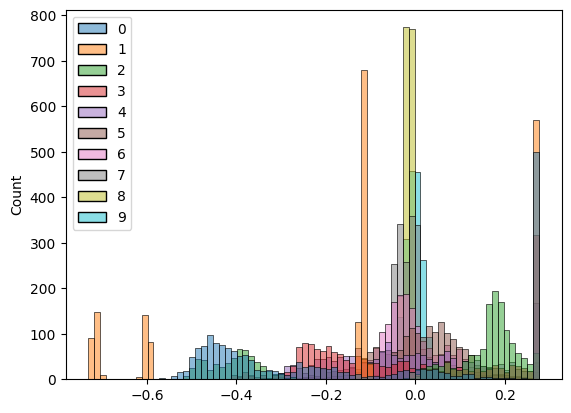

In [37]:
std = np.std(new_x_normed)
mean = np.mean(new_x_normed)
left_lim = mean - std
right_lim = mean + std
new_x_normed_4 = np.clip(left_lim, right_lim, new_x_normed)
sns.histplot(new_x_normed_4)

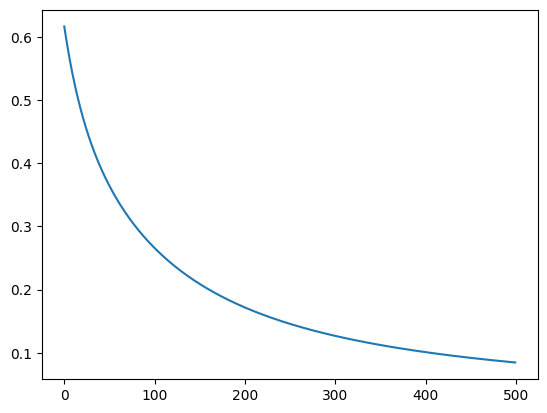

0.08463853192164858


In [38]:
model = LogisticRegression(dim = new_x_normed.shape[1])
model.fit(new_x_normed,y1_train)

In [39]:
preds = model.predict(new_x_normed_test) 
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds)))
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))

Accurace : 0.99
F1 : 0.97


Применение правила 3 сигм почти не изменяетс, можем сделать вывод о том, что в данной нормировке вообще не стоит использовать способы обработки выбросов

## 1.4 Обучение итоговой модели

6)Используем минимаксную нормализацию с сайта: https://wiki.loginom.ru/articles/data-normalization.html

In [40]:
# Обучите модель на трансформированных данных.
x_train, y_train, x_test, y_test = load_data('dataset')
# Напишите ваш код здесь.

In [41]:
# для обучения
x_min = np.min(x_train, axis = 0) # минимальное значение в выборке
x_max = np.max(x_train, axis = 0) # максимальное значение в выборке
x_normed = (x_train - x_min) / (x_max - x_min) # нормированное значение
# для теста
x_min_test = np.min(x_test, axis = 0) # минимальное значение в выборке
x_max_test = np.max(x_test, axis = 0) # максимальное значение в выборке
x_normed_test = (x_test - x_min_test) / (x_max_test - x_min_test) # нормированное значение

In [42]:
pca  = PCA(n_components=x_normed.shape[1]).fit(x_normed)
pca.explained_variance_.cumsum()/pca.explained_variance_.sum()

array([0.36718238, 0.7045579 , 0.80220473, 0.87838707, 0.93675991,
       0.95601885, 0.96796095, 0.97522627, 0.98203851, 0.98875774,
       0.99440529, 0.99679349, 0.99857846, 0.99934316, 0.99976736,
       0.99986578, 0.99994024, 0.999988  , 0.99999868, 1.        ])

При применении минимаксной нормировки мы видим, что 10 компонент объясняет 98,87% дисперсии по сравнению с нормировкой(деление на максильное - 98,82%)

In [43]:
pca2  = PCA(n_components = 10).fit(x_normed)
new_x_normed = pca2.transform(x_normed)
new_x_normed.shape

(1920, 10)

In [44]:
pca_test  = PCA(n_components = 10).fit(x_normed_test)
new_x_normed_test = pca_test.transform(x_normed_test)
new_x_normed_test.shape

(480, 10)

In [45]:
y1_train = y_train.values
y1_test = y_test.values

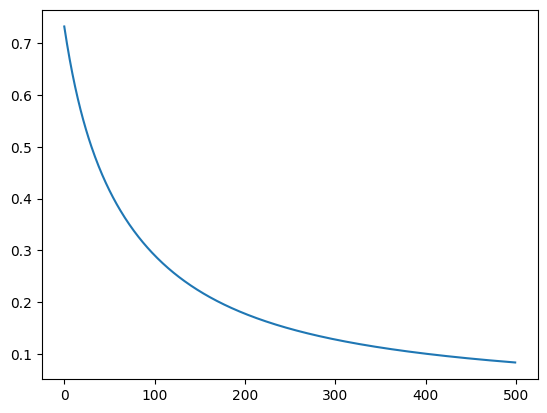

0.08394479285985258


In [46]:
model = LogisticRegression(dim = new_x_normed.shape[1])
model.fit(new_x_normed,y1_train)

In [47]:
# Оцените качество обученной модели.
preds = model.predict(new_x_normed_test) 
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds)))
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))
# Напишите ваш код здесь.

Accurace : 0.99
F1 : 0.97


Неплохое значение F1

7)Применим метод 95 перцентиля для обработки выбросов для нормализации в 6 пункте;

<AxesSubplot: ylabel='Count'>

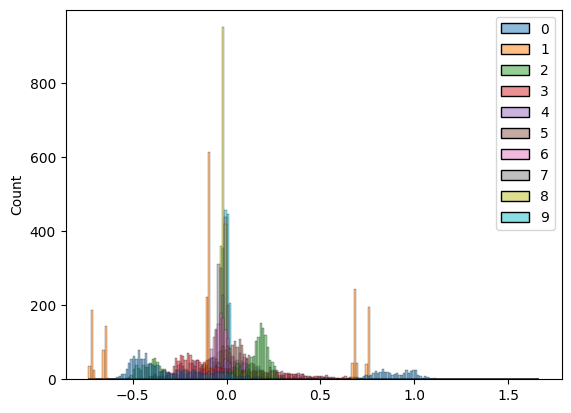

In [48]:
sns.histplot(new_x_normed)

<AxesSubplot: ylabel='Count'>

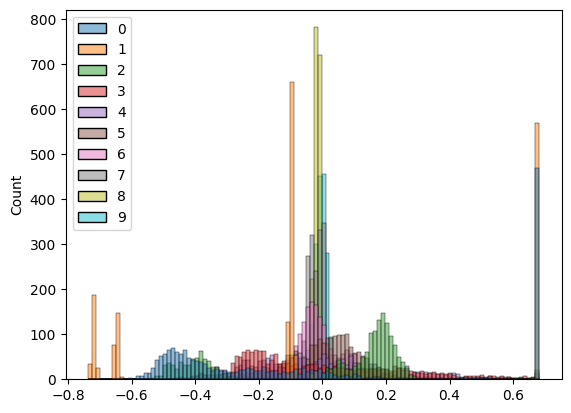

In [49]:
perc = np.percentile(new_x_normed,95)
left_lim = -1
right_lim = perc
new_x_normed_5 = np.clip(left_lim, right_lim, new_x_normed)
sns.histplot(new_x_normed_5)

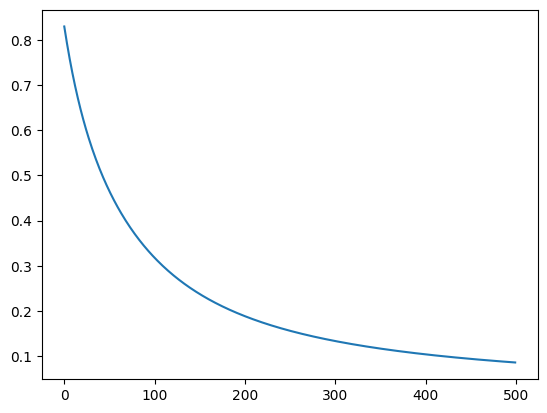

0.08579011749182468


In [50]:
model = LogisticRegression(dim = new_x_normed.shape[1])
model.fit(new_x_normed,y1_train)

In [51]:
preds = model.predict(new_x_normed_test) 
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds)))
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))

Accurace : 0.99
F1 : 0.97


Значение метрики F1 почти не изменилось

8)Применим правило 3 сигма для обработки выбросов для нормализации в 6 пункте.

<AxesSubplot: ylabel='Count'>

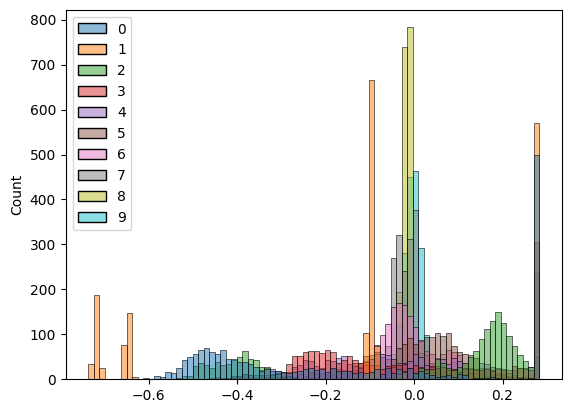

In [52]:
std = np.std(new_x_normed)
mean = np.mean(new_x_normed)
left_lim = mean - std
right_lim = mean + std
new_x_normed_6 = np.clip(left_lim, right_lim, new_x_normed)
sns.histplot(new_x_normed_6)

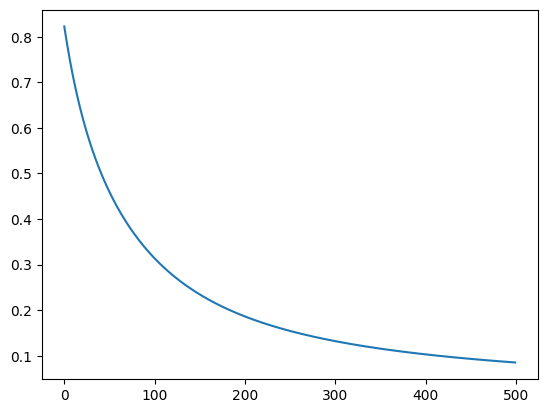

0.08519611720737777


In [53]:
model = LogisticRegression(dim = new_x_normed.shape[1])
model.fit(new_x_normed,y1_train)

In [54]:
preds = model.predict(new_x_normed_test) 
print('Accurace : {:.2f}'.format(accuracy_score(y1_test, preds)))
print('F1 : {:.2f}'.format(f1_score(y1_test, preds)))

Accurace : 0.99
F1 : 0.97


Правило 3 сигм почти не изменяет результат

## 2. Доп. задание (опционально)

В случае невозможности балансировки классов на уровне данных (как в ЛР1) используется балансировка на алгоритмическом уровне: 
взвешиваются значения функции ошибки для разных классов (большие веса используются для редких классов, малые веса для доминирующих классов), чтобы модель во время обучения 'фокусировалась' именно на редких классах. В данной лабораторной работе балансировка на уровне данных возможна, однако рассмотрение такого подхода даст вам еще один полезный практический инструмент.

Модифицируйте класс логистической регрессии так, чтобы во время обучения значения функции ошибки взвешивались для разных классов. 
Изменения будут представлять собой взвешивание индивидуальных градиентов (строки кода 28 и 29) для отдельных экземпляров данных.

Указание: не изменяйте код, связанный с вычислением `binary_cross_entropy`.

Сложность: энтузиаст-математик.

In [14]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def binary_cross_entropy(pred, label):
    return -np.mean(label * np.log(pred + 1e-6) + (1. - label) * np.log(1 - pred + 1e-6))


class LogisticRegression:
    def __init__(self, dim=2, class_weight=None):
        self.w = np.random.randn(dim, 1) / np.sqrt(dim)
        self.b = np.zeros((1,))
        self.class_weight = class_weight
        
    def predict(self, x, probs=False):
        x = x.dot(self.w) + self.b
        p = sigmoid(x)
        if probs:
            return p
        return np.array(p > 0.5).astype('int32')
        
    def fit(self, x, y, iters=300, lr=0.1):
        # Внесите модификации здесь.
        y = y.reshape(-1, 1)
        loss = []
        for i in range(iters):
            preds = self.predict(x, probs=True)
            self.w -= lr * x.T.dot(preds - y) / y.shape[0]
            self.b -= lr * np.mean(preds - y, axis=0)
            loss.append(binary_cross_entropy(preds, y))
        return loss

In [15]:
# Предложите подход к взвешиванию классов (веса классов будут представлять собой 2 числа - вес для класса 0 и вес для класса 1). 
# Создайте и обучите модель на данных из пункта 1.1. Сохраните возвращенные значения функции ошибки.
# Оцените качество обученной модели.

# Напишите ваш код здесь.

In [16]:
# Создайте и обучите модель на данных из пункта 1.1 без использования взвешивания. Сохраните возвращенные значения функции ошибки.
# Оцените качество обученной модели.

# Напишите ваш код здесь.

In [17]:
# Постройте графики функции ошибок для обеих моделей. Сформулируйте выводы.

# Напишите ваш код здесь.

In [18]:
# Создайте и обучите модель на данных из пункта 1.3. Сохраните возвращенные значения функции ошибки.
# Оцените качество обученной модели.

# Напишите ваш код здесь.

In [19]:
# Создайте и обучите модель на данных из пункта 1.3 без использования взвешивания. Сохраните возвращенные значения функции ошибки.
# Оцените качество обученной модели.

# Напишите ваш код здесь.

In [20]:
# Постройте графики функции ошибок для обеих моделей. Сформулируйте выводы.

# Напишите ваш код здесь.